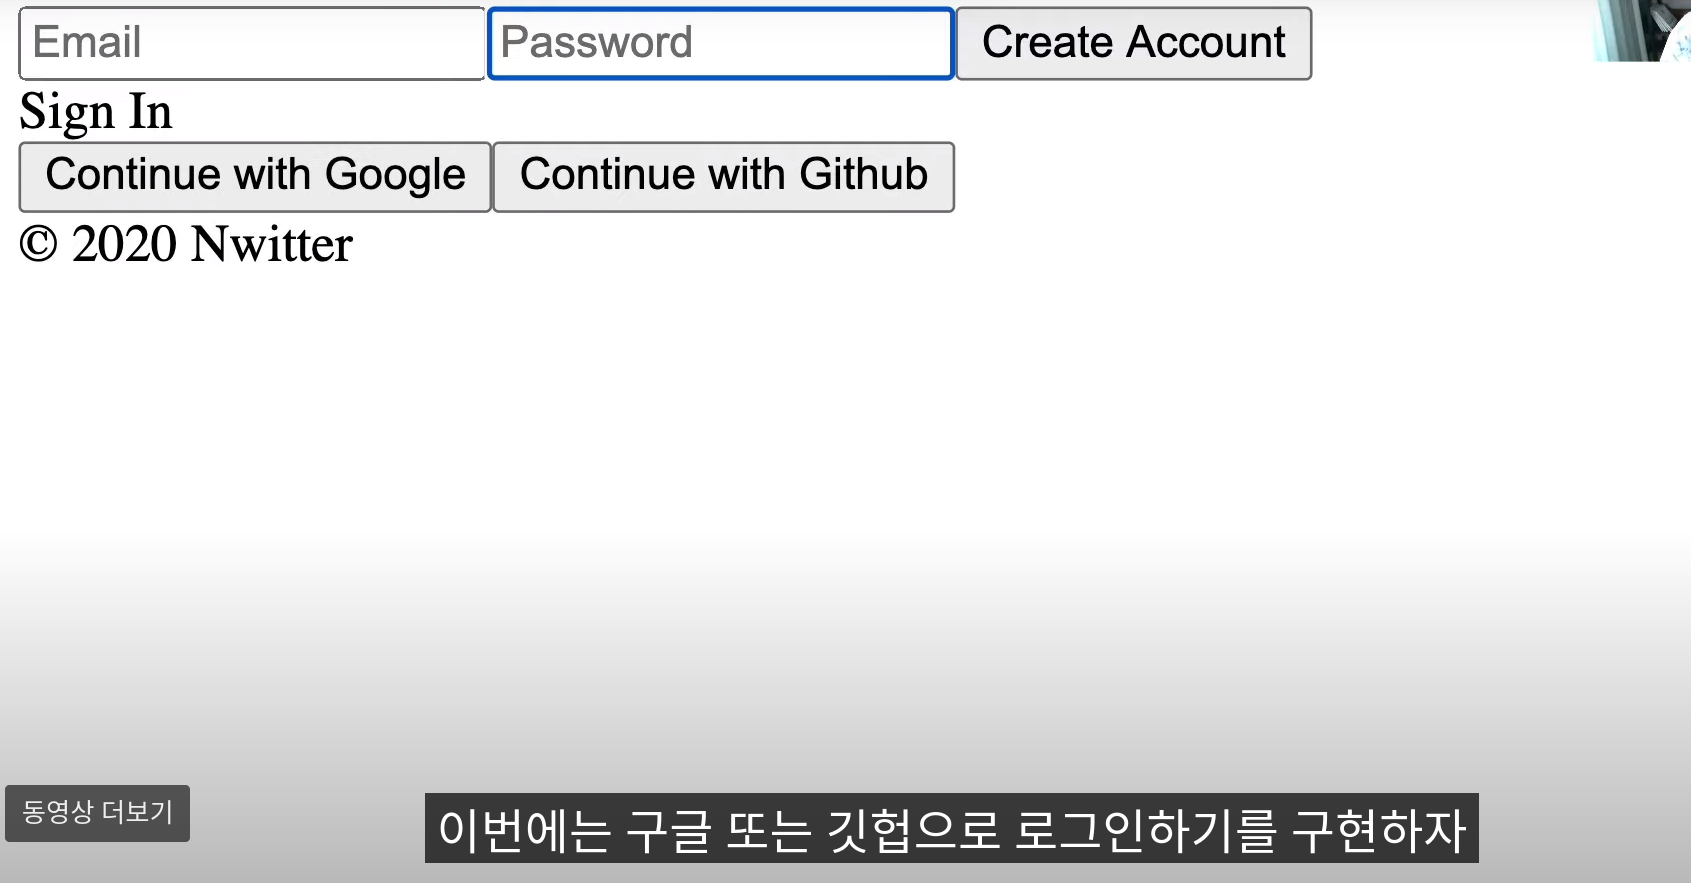

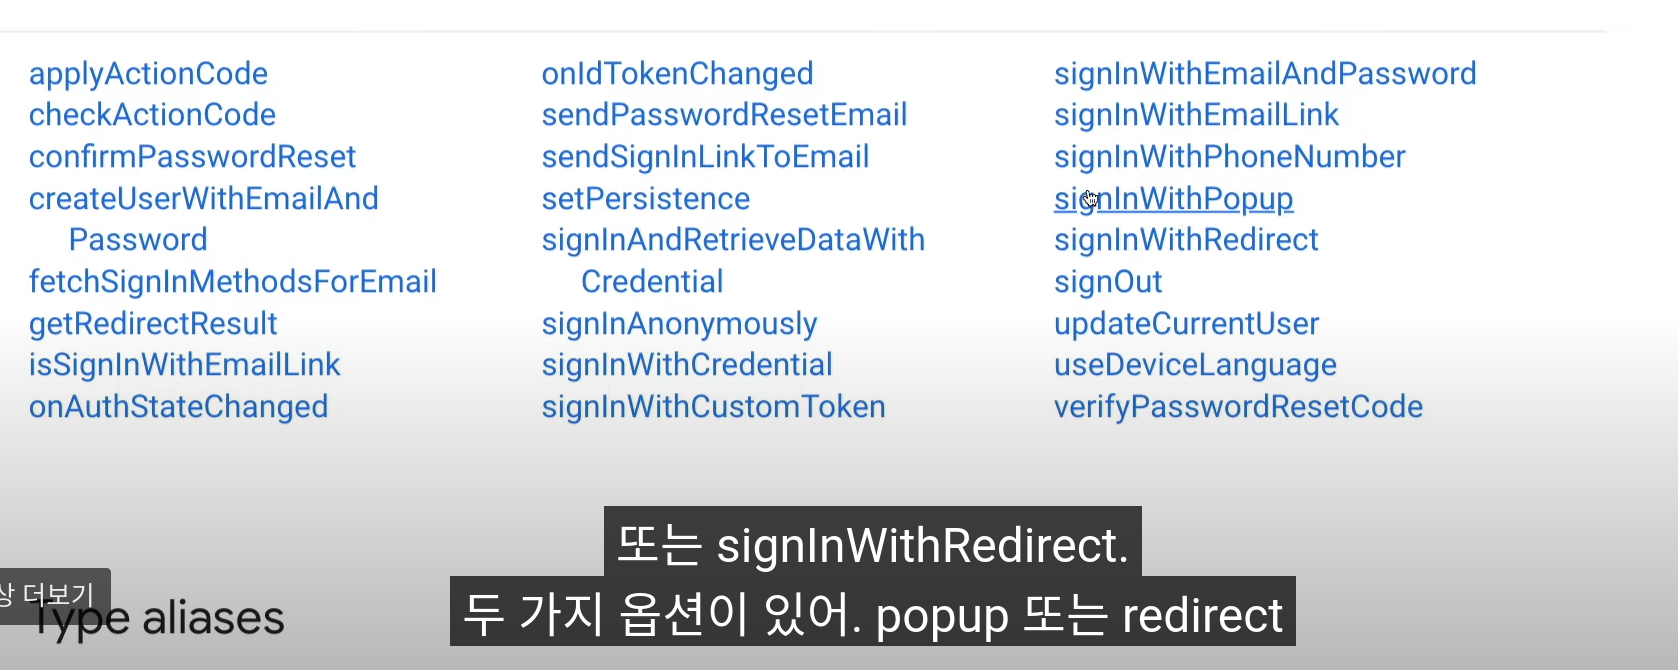

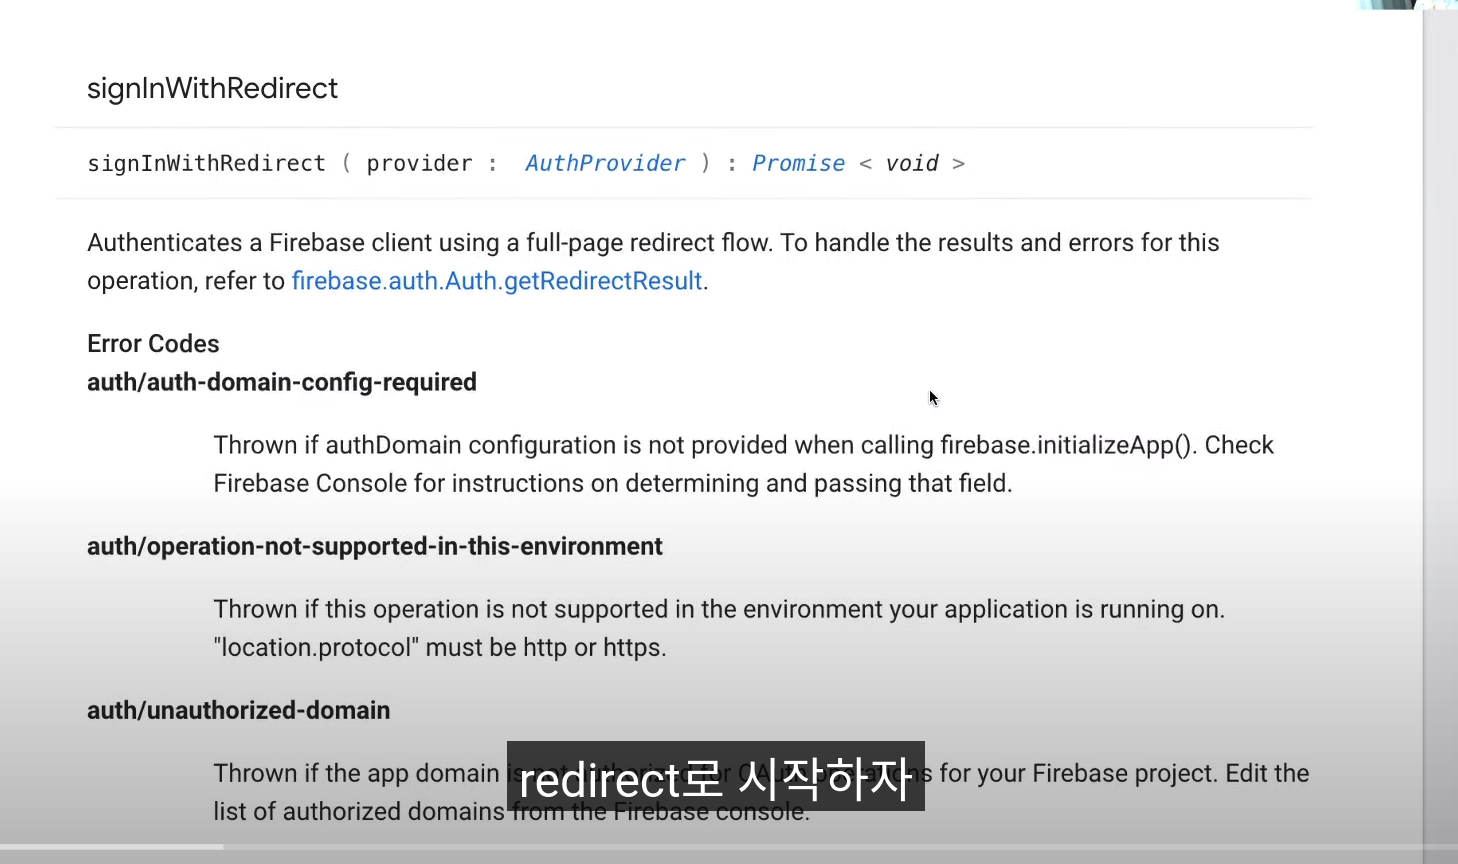

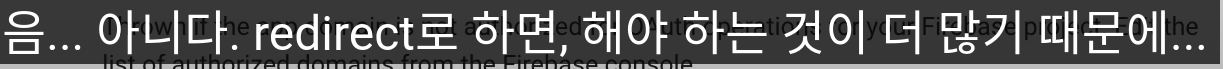

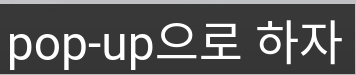

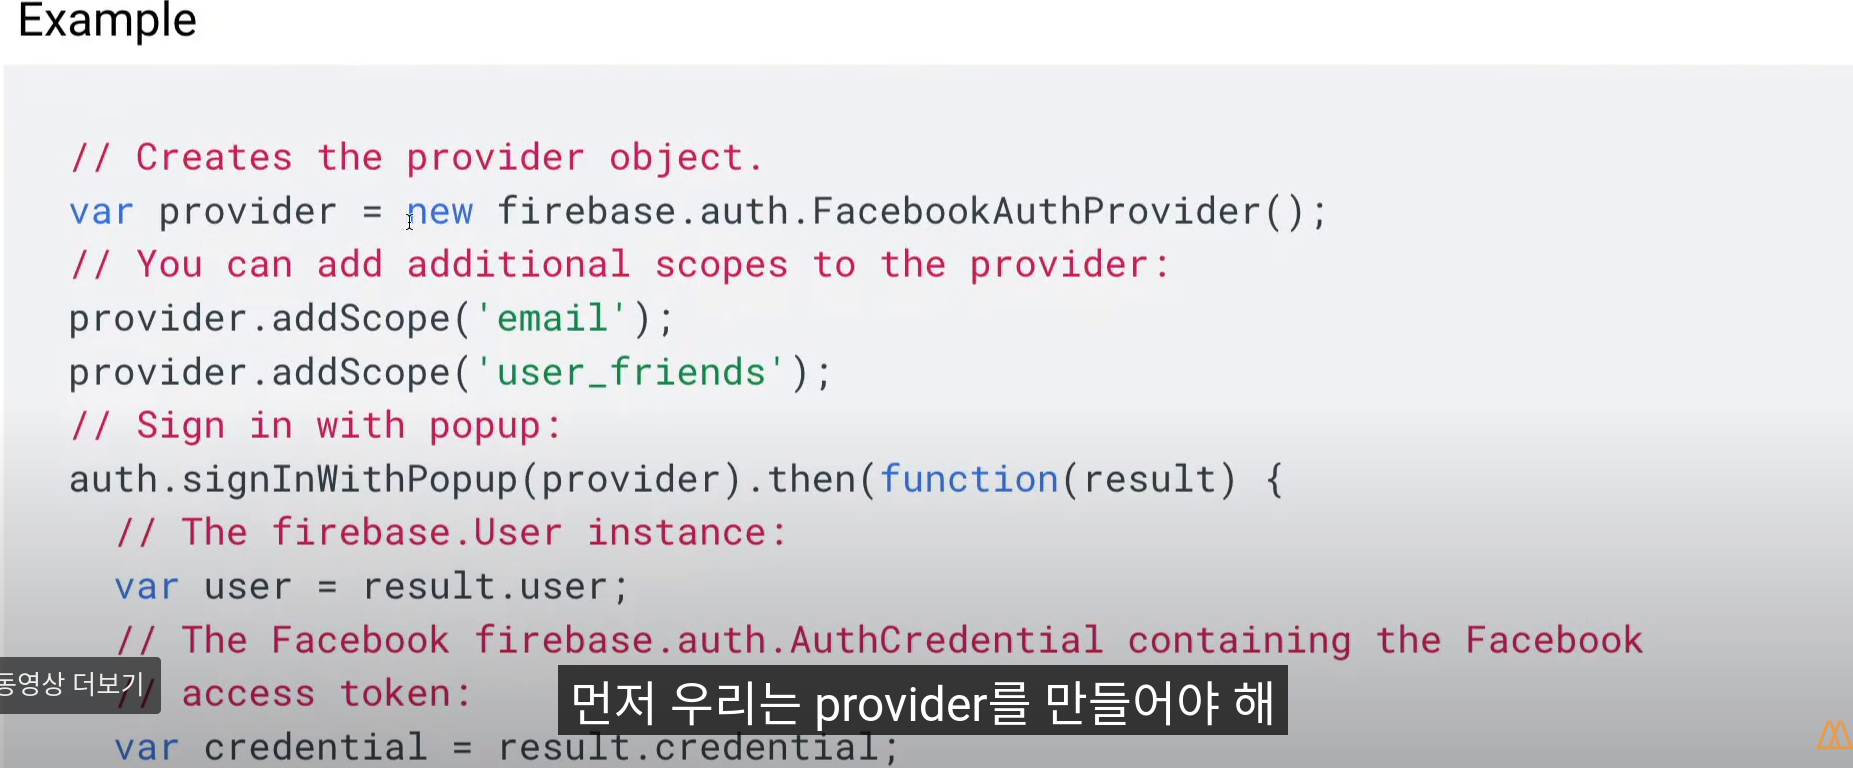

# Auth.js
```jsx
import { useState } from "react";
import { authService } from "fbase";

// firebase - Persistence browserSessionPersistence
// https://firebase.google.com/docs/auth/web/auth-state-persistence?authuser=1&hl=ko

// firebase - login signInWithEmailAndPassword, createUserWithEmailAndPassword
// https://firebase.google.com/docs/auth/web/start?hl=ko&authuser=1

// Google - https://firebase.google.com/docs/reference/js/auth.googleauthprovider?hl=ko#googleauthprovidergoogle_sign_in_method
import {
  createUserWithEmailAndPassword,
  signInWithEmailAndPassword,
  GithubAuthProvider, // - git Auth
  GoogleAuthProvider, // - google Auth
  signInWithPopup, // popup -with api login
} from "firebase/auth";

function Auth() {
  const [email, setEmail] = useState("");
  const [password, setPassword] = useState("");
  const [newAccount, setNewAccount] = useState(true);
  const [error, setError] = useState("");

  const onChange = (event) => {
    const {
      target: { name, value },
    } = event;
    if (name === "email") {
      setEmail(value);
    } else if (name === "password") {
      setPassword(value);
    }
  };
  const onSubmit = async (event) => {
    event.preventDefault();
    let data;
    try {
      if (newAccount) {
        // create account
        data = await createUserWithEmailAndPassword(
          authService,
          email,
          password
        );
      } else {
        // log in
        data = await signInWithEmailAndPassword(authService, email, password);
      }
      console.log(data);
    } catch (error) {
      console.log(error.message);
      setError(error.message);
    }
  };

  const toggleAccount = () => setNewAccount((prev) => !prev);
  const onSocialClick = async (event) => {
    const {
      target: { name },
    } = event;
    let provider;
    if (name === "google") {
      provider = new GoogleAuthProvider();
    } else if (name === "github") {
      provider = new GithubAuthProvider();
    }
    await signInWithPopup(authService, provider);
  };

  return (
    <>
      <form onSubmit={onSubmit}>
        <input
          name="email"
          type="email"
          placeholder="Email"
          required
          value={email}
          onChange={onChange}
        />
        <input
          name="password"
          type="password"
          placeholder="Password"
          required
          value={password}
          onChange={onChange}
        />
        <input type="submit" value={newAccount ? "Create Account" : "Log In"} />
        {error}
      </form>
      <span onClick={toggleAccount}>
        {newAccount ? "Log in" : "Create Account"}
      </span>
      <div>
        <button name="google" onClick={onSocialClick}>
          Continue with Google
        </button>
        <button name="github" onClick={onSocialClick}>
          Continue with Github
        </button>
      </div>
    </>
  );
}

export default Auth;

```

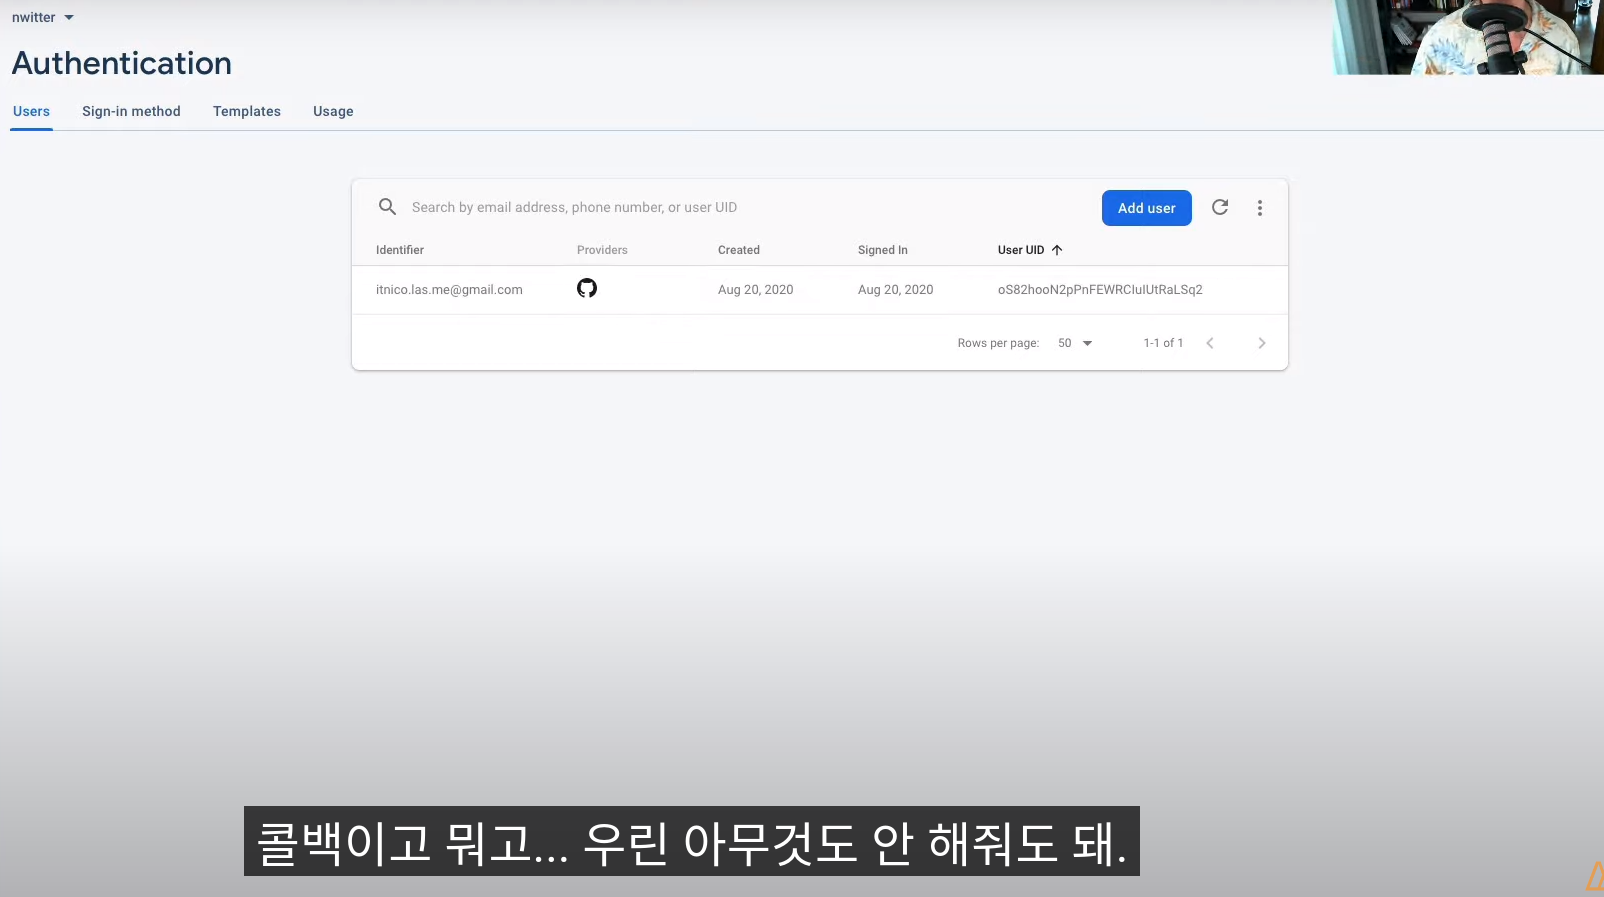